In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np

In [5]:
# Define constants
IMAGE_SIZE = (400, 400)
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 26
VALIDATION_SPLIT = 0.2  # 20% of the training data will be used for validation

Found 4681 images belonging to 26 classes.


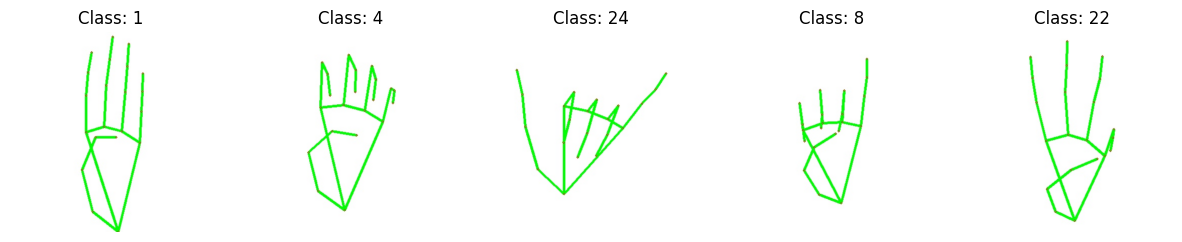

In [6]:
# Set the path to your dataset
DATASET_DIR = 'AtoZ_3.1'

# Data preprocessing (no augmentation needed for viewing)
datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directory
generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True  # Shuffle to get random images
)

# Get a batch of images and labels
images, labels = next(generator)

# Define how many images you want to plot
num_images_to_plot = 5

# Plot the images
plt.figure(figsize=(15, 15))
for i in range(num_images_to_plot):
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.imshow(images[i])
    plt.title(f'Class: {np.argmax(labels[i])}')
    plt.axis('off')
plt.show()

In [7]:
# Set the path to your training dataset
TRAIN_DIR = 'AtoZ_3.1'

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=VALIDATION_SPLIT  # Set validation split
)

# Training data generator
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Use subset for training
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Use subset for validation
)

Found 3746 images belonging to 26 classes.
Found 935 images belonging to 26 classes.


In [8]:
# Define the model
model = models.Sequential()

# First Conv2D layer followed by MaxPooling2D
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Conv2D layer followed by MaxPooling2D
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Conv2D layer followed by MaxPooling2D
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth Conv2D layer followed by MaxPooling2D
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))

# Output layer with 26 units (for 26 classes) and softmax activation
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 16)       0

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

In [ ]:
# Save the model
model.save('alphabet_classification_model.h5')

In [ ]:
# Optionally, plot the training results
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
